In [1]:
import os
if os.getcwd().endswith('lab05_dt'):
    os.chdir('..')

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, 20))
}

# Получение и обработка данных

In [5]:
from lab05_dt.utils import data

In [6]:
data.read_data(1)

(array([[  65938, -109121,  101371, ..., -170592,  -84944,  -74420],
        [  83426,  -28524, -100525, ..., -206699,  146491,  -31888],
        [ -96851,   15578,   -5402, ..., -214913, -138813,   34742],
        ...,
        [ 118844,  185829,   52991, ..., -164917, -112773, -152723],
        [  -4249,  -78916, -447121, ..., -203657,  -67214,  189604],
        [ -40795,  141854, -208036, ..., -148012,  -36454,  -59921]],
       dtype=int64),
 array([ 3, 10, 12, ..., 10, 11, 11], dtype=int64),
 array([[ -69691,  -95272,    2755, ..., -167017,  -87926,    5119],
        [ -78257,     353,  109992, ..., -235769,    8230, -196985],
        [  14845,  -62676,  410515, ..., -220196, -175719,  241682],
        ...,
        [  69703, -141710, -352157, ..., -159649, -172161,  146793],
        [-111130,   60546, -211976, ..., -207998, -174463,  -33210],
        [  97486,   14878,  273347, ..., -214991, -135835, -155848]],
       dtype=int64),
 array([11, 12, 12, ..., 10, 11, 12], dtype=int64)

In [7]:
from sklearn.metrics import accuracy_score

def custom_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred)

USE_DEFAULT = True
if USE_DEFAULT:
    accuracy = accuracy_score
else:
    accuracy = custom_accuracy

In [8]:
datasets = [data.read_data(i) for i in range(1, 22)]

# Определение крайних высот

In [9]:
top_scores = []
for i, dataset in enumerate(datasets):
    print(f'Dataset {i + 1}:')
    results = dict()
    for max_depth in search_params['max_depth']:
        best_score = 0
        best_params = None
        for criterion in search_params['criterion']:
            for splitter in search_params['splitter']:
                cls = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)
                cls.fit(dataset[0], dataset[1])
                y_pred = cls.predict(dataset[2])
                score = accuracy(dataset[3], y_pred)
                if score > best_score:
                    best_score = score
                    best_params = (criterion, splitter)
        print(f'-- md {max_depth}: {best_score} on {best_params}')
        results[max_depth] = (best_score, best_params)
    re = max(results.items(), key=lambda t: t[1][0])
    print(f'- best: {re}')
    top_scores.append(re)

Dataset 1:
-- md 1: 0.638396299151889 on ('gini', 'best')
-- md 2: 0.8650732459521974 on ('gini', 'best')
-- md 3: 0.9997429966589566 on ('entropy', 'best')
-- md 4: 0.9989719866358263 on ('entropy', 'best')
-- md 5: 0.9979439732716525 on ('entropy', 'best')
-- md 6: 0.9938319198149576 on ('gini', 'best')
-- md 7: 0.9915188897455667 on ('gini', 'best')
-- md 8: 0.9876638396299152 on ('gini', 'best')
-- md 9: 0.9840657928553072 on ('gini', 'best')
-- md 10: 0.9802107427396556 on ('gini', 'best')
-- md 11: 0.9750706759187869 on ('gini', 'best')
-- md 12: 0.9717296324852223 on ('gini', 'best')
-- md 13: 0.9655615523001799 on ('gini', 'best')
-- md 14: 0.9678745823695708 on ('gini', 'best')
-- md 15: 0.959650475456181 on ('gini', 'best')
-- md 16: 0.9542534052942688 on ('gini', 'best')
-- md 17: 0.9506553585196608 on ('gini', 'best')
-- md 18: 0.9503983551786174 on ('gini', 'best')
-- md 19: 0.9416602415831405 on ('gini', 'best')
- best: (3, (0.9997429966589566, ('entropy', 'best')))
Datas

-- md 7: 0.8156862745098039 on ('entropy', 'best')
-- md 8: 0.7862745098039216 on ('entropy', 'best')
-- md 9: 0.803921568627451 on ('entropy', 'best')
-- md 10: 0.792156862745098 on ('entropy', 'best')
-- md 11: 0.807843137254902 on ('entropy', 'best')
-- md 12: 0.8137254901960784 on ('entropy', 'best')
-- md 13: 0.7980392156862746 on ('entropy', 'best')
-- md 14: 0.796078431372549 on ('entropy', 'best')
-- md 15: 0.8254901960784313 on ('entropy', 'best')
-- md 16: 0.8137254901960784 on ('entropy', 'best')
-- md 17: 0.7941176470588235 on ('entropy', 'best')
-- md 18: 0.8313725490196079 on ('entropy', 'best')
-- md 19: 0.8019607843137255 on ('entropy', 'best')
- best: (5, (0.8431372549019608, ('entropy', 'best')))
Dataset 10:
-- md 1: 0.38953722334004026 on ('gini', 'best')
-- md 2: 0.7311871227364185 on ('gini', 'best')
-- md 3: 0.9935613682092556 on ('entropy', 'best')
-- md 4: 0.9979879275653923 on ('entropy', 'best')
-- md 5: 0.9963782696177063 on ('entropy', 'best')
-- md 6: 0.989

-- md 11: 0.8135120044667783 on ('entropy', 'best')
-- md 12: 0.8040201005025126 on ('entropy', 'best')
-- md 13: 0.8129536571747628 on ('entropy', 'best')
-- md 14: 0.7978782802903406 on ('entropy', 'best')
-- md 15: 0.8040201005025126 on ('entropy', 'best')
-- md 16: 0.8012283640424344 on ('entropy', 'best')
-- md 17: 0.8001116694584032 on ('entropy', 'best')
-- md 18: 0.8062534896705751 on ('entropy', 'best')
-- md 19: 0.8118369625907315 on ('entropy', 'best')
- best: (7, (0.8447794528196538, ('entropy', 'best')))
Dataset 18:
-- md 1: 0.6932241250930752 on ('gini', 'best')
-- md 2: 0.7297096053611318 on ('gini', 'best')
-- md 3: 0.8116157855547282 on ('entropy', 'best')
-- md 4: 0.9389426656738645 on ('entropy', 'best')
-- md 5: 0.9426656738644825 on ('entropy', 'best')
-- md 6: 0.93596425912137 on ('entropy', 'best')
-- md 7: 0.91734921816828 on ('entropy', 'best')
-- md 8: 0.91734921816828 on ('entropy', 'best')
-- md 9: 0.9009679821295606 on ('entropy', 'best')
-- md 10: 0.915115

In [10]:
list(enumerate(top_scores))

[(0, (3, (0.9997429966589566, ('entropy', 'best')))),
 (1, (9, (0.7038167938931298, ('entropy', 'best')))),
 (2, (1, (1.0, ('gini', 'best')))),
 (3, (5, (0.9930434782608696, ('gini', 'best')))),
 (4, (1, (0.9956709956709957, ('gini', 'best')))),
 (5, (3, (0.9988962472406181, ('entropy', 'best')))),
 (6, (3, (0.9967441860465116, ('entropy', 'best')))),
 (7, (2, (0.997920997920998, ('gini', 'best')))),
 (8, (5, (0.8431372549019608, ('entropy', 'best')))),
 (9, (4, (0.9979879275653923, ('entropy', 'best')))),
 (10, (1, (0.999195171026157, ('gini', 'best')))),
 (11, (10, (0.8790345214706707, ('entropy', 'best')))),
 (12, (7, (0.6559633027522935, ('entropy', 'best')))),
 (13, (5, (0.990351215746816, ('entropy', 'best')))),
 (14, (1, (1.0, ('gini', 'best')))),
 (15, (1, (1.0, ('gini', 'best')))),
 (16, (7, (0.8447794528196538, ('entropy', 'best')))),
 (17, (5, (0.9426656738644825, ('entropy', 'best')))),
 (18, (7, (0.8357089272318079, ('entropy', 'best')))),
 (19, (7, (0.9687004754358162, ('

In [ ]:
ds1 = 10
c1 = 'gini'
ds2 = 20
c2 = 'entropy'

# Графики зависимости от высоты

In [ ]:
def plot(ds, criterion):
    dataset = datasets[ds]
    r_train = []
    r_test = []
    for max_depth in search_params['max_depth']:
        cls = DecisionTreeClassifier(criterion=criterion, splitter='best', max_depth=max_depth)
        cls.fit(dataset[0], dataset[1])
        y_pred_train = cls.predict(dataset[0])
        y_pred_test = cls.predict(dataset[2])
        r_train.append(accuracy(dataset[1], y_pred_train))
        r_test.append(accuracy(dataset[3], y_pred_test))
    plt.plot(search_params['max_depth'], r_train, color='red')
    plt.plot(search_params['max_depth'], r_test, color='green')
    plt.xlabel('max_depth')
    plt.ylabel('accuracy')

In [ ]:
plot(ds1, c1)

In [ ]:
plot(ds2, c2)

# Построим лес решающих деревьев

In [ ]:
from lab05_dt.forest import Forest

In [ ]:
for i, dataset in enumerate(datasets):
    print(f'Dataset {i + 1}:')
    score = top_scores[i][1]
    print(f'- tree top score [test]: {score[0]}')
    criterion, splitter = score[1][0], score[1][1]
    print(f'- forest:')
    for n_trees in range(5, 50, 5):
        forest = Forest(n_trees, criterion=criterion, splitter=splitter)
        forest.fit(dataset[0], dataset[1])
        y_pred_train = forest.predict(dataset[0])
        y_pred_test = forest.predict(dataset[2])
        acc_train = accuracy(dataset[1], y_pred_train)
        acc_test = accuracy(dataset[3], y_pred_test)
        print(f'-- {n_trees} tress: {acc_train} [train] / {acc_test} [test]')

# Графики зависимости от высоты

In [13]:
def plot(ds, criterion):
    dataset = datasets[ds]
    r_train = []
    r_test = []
    for max_depth in search_params['max_depth']:
        cls = DecisionTreeClassifier(criterion=criterion, splitter='best', max_depth=max_depth)
        cls.fit(dataset[0], dataset[1])
        y_pred_train = cls.predict(dataset[0])
        y_pred_test = cls.predict(dataset[2])
        r_train.append(accuracy(dataset[1], y_pred_train))
        r_test.append(accuracy(dataset[3], y_pred_test))
    plt.plot(search_params['max_depth'], r_train, color='red')
    plt.plot(search_params['max_depth'], r_test, color='green')
    plt.xlabel('max_depth')
    plt.ylabel('accuracy')

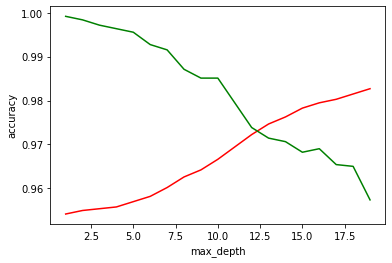

In [14]:
plot(ds1, c1)

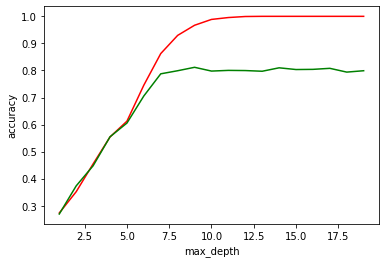

In [15]:
plot(ds2, c2)

# Построим лес решающих деревьев

In [16]:
from lab05_dt.forest import Forest

In [18]:
for i, dataset in enumerate(datasets):
    print(f'Dataset {i + 1}:')
    score = top_scores[i][1]
    print(f'- tree top score [test]: {score[0]}')
    criterion, splitter = score[1][0], score[1][1]
    print(f'- forest:')
    for n_trees in range(5, 50, 5):
        forest = Forest(n_trees, criterion=criterion, splitter=splitter)
        forest.fit(dataset[0], dataset[1])
        y_pred_train = forest.predict(dataset[0])
        y_pred_test = forest.predict(dataset[2])
        acc_train = accuracy(dataset[1], y_pred_train)
        acc_test = accuracy(dataset[3], y_pred_test)
        print(f'-- {n_trees} tress: {acc_train} [train] / {acc_test} [test]')

Dataset 1:
- tree top score [test]: 0.9997429966589566
- forest:
-- 5 tress: 0.9773837059881778 [train] / 0.7265484451297867 [test]
-- 10 tress: 0.995887946543305 [train] / 0.8902595733744538 [test]
-- 15 tress: 0.9994859933179131 [train] / 0.7704960164482139 [test]
-- 20 tress: 1.0 [train] / 0.8429709586224621 [test]
-- 25 tress: 0.9994859933179131 [train] / 0.9432022616294011 [test]
-- 30 tress: 1.0 [train] / 0.8753533795939347 [test]
-- 35 tress: 1.0 [train] / 0.8036494474428167 [test]
-- 40 tress: 1.0 [train] / 0.9095348239527113 [test]
-- 45 tress: 1.0 [train] / 0.8206116679516834 [test]
Dataset 2:
- tree top score [test]: 0.7038167938931298
- forest:
-- 5 tress: 0.938676844783715 [train] / 0.12849872773536897 [test]
-- 10 tress: 0.9900763358778626 [train] / 0.14376590330788805 [test]
-- 15 tress: 0.999236641221374 [train] / 0.15572519083969466 [test]
-- 20 tress: 1.0 [train] / 0.1575063613231552 [test]
-- 25 tress: 1.0 [train] / 0.17557251908396945 [test]
-- 30 tress: 1.0 [train]

-- 20 tress: 1.0 [train] / 0.34118101119258976 [test]
-- 25 tress: 1.0 [train] / 0.323427248166731 [test]
-- 30 tress: 1.0 [train] / 0.353145503666538 [test]
-- 35 tress: 1.0 [train] / 0.382863759166345 [test]
-- 40 tress: 1.0 [train] / 0.3554612118873022 [test]
-- 45 tress: 1.0 [train] / 0.4307217290621382 [test]
Dataset 15:
- tree top score [test]: 1.0
- forest:
-- 5 tress: 0.9831831831831832 [train] / 0.9441441441441442 [test]
-- 10 tress: 0.9915915915915916 [train] / 0.9543543543543543 [test]
-- 15 tress: 0.9945945945945946 [train] / 0.9501501501501501 [test]
-- 20 tress: 1.0 [train] / 0.9525525525525526 [test]
-- 25 tress: 0.9981981981981982 [train] / 0.9501501501501501 [test]
-- 30 tress: 0.9993993993993994 [train] / 0.9501501501501501 [test]
-- 35 tress: 0.9993993993993994 [train] / 0.9501501501501501 [test]
-- 40 tress: 0.9993993993993994 [train] / 0.9501501501501501 [test]
-- 45 tress: 0.9993993993993994 [train] / 0.9501501501501501 [test]
Dataset 16:
- tree top score [test]: 